In [26]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
def stable_behavior_index(frame: list, value: float):
    # find first max
    index = np.argmax(np.array(frame) >= value)
    # go through rest and see if it drops below
    for ii in range(index + 1, len(frame)):
        if frame[ii] < value:
            index = ii + np.argmax(np.array(frame)[ii:] >= value)
            ii = index
    return index


def build_df_from_csvs(path: str, frame_attributes: str, values: int) -> pd.DataFrame:
    files = os.listdir(path)
    df = []
    for ii in range(len(frame_attributes)):
        df.append(pd.DataFrame())
    # df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        # df_tmp['Path'] = join(path, current_file)

        df_tmp['jsd'] = df_tmp['jsd'].apply(lambda x: 1 - x)
        df_tmp.rename(columns = {'jsd':'ijsd'}, inplace = True)

        for ii, (k, v) in enumerate(zip(frame_attributes, values)):
            df[ii] = df[ii].append(pd.Series(df_tmp.loc[stable_behavior_index(df_tmp[k], v)]), ignore_index=True)


    return df

In [28]:
path = '../data/graphs/kw34/results'

sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

dfs_ari = build_df_from_csvs(path, ['ari']*3, [0.8, 0.9, 0.95])
dfs_ijsd = build_df_from_csvs(path, ['ijsd']*4, [0.9, 0.95, 0.98, 0.99])

In [29]:
for i, df in enumerate(dfs_ari):
    dfs_ari[i]['Sampling'] = pd.Categorical(df['Sampling'], ['randomsampling', 'randomwalk', 'pagerank', 'modifiedrandomwalk', 'merandomwalk', 'dwug'])
    dfs_ari[i]['Clustering'] = pd.Categorical(df['Clustering'], ['cc_split', 'cc_nosplit', 'ccc', 'cw', 'lm'])
    dfs_ari[i] = df.sort_values(['Sampling', 'Clustering'])
    dfs_ari[i]['Sampling-Clustering'] = df['Sampling'].astype(str) + '-' + df['Clustering'].astype(str)

for i, df in enumerate(dfs_ijsd):
    dfs_ijsd[i]['Sampling'] = pd.Categorical(df['Sampling'], ['randomsampling', 'randomwalk', 'pagerank', 'modifiedrandomwalk', 'merandomwalk', 'dwug'])
    dfs_ijsd[i]['Clustering'] = pd.Categorical(df['Clustering'], ['cc_split', 'cc_nosplit', 'ccc', 'cw', 'lm'])
    dfs_ijsd[i] = df.sort_values(['Sampling', 'Clustering'])
    dfs_ijsd[i]['Sampling-Clustering'] = df['Sampling'].astype(str) + '-' + df['Clustering'].astype(str)


In [30]:
dfs_ijsd[2].head()

,Checkpoint,bootstrap_jsd,gambette,cluster_number,ijsd,ari,n,k,log,Sampling,Clustering,Sampling-Clustering
2,5000.0,0.063676,0.162556,9.0,0.973174,0.613044,100.0,10.0,0.5,randomsampling,cc_split,randomsampling-cc_split
27,5000.0,0.135003,0.011054,25.0,0.879374,0.879262,100.0,10.0,0.9,randomsampling,cc_split,randomsampling-cc_split
50,200.0,0.042838,0.331061,9.0,0.989922,0.841102,100.0,7.0,0.1,randomsampling,cc_split,randomsampling-cc_split
116,200.0,0.029636,0.370467,7.0,0.999989,1.000000,100.0,7.0,0.1,randomsampling,cc_split,randomsampling-cc_split
139,5000.0,0.039607,0.044033,6.0,0.959275,0.638351,100.0,3.0,0.9,randomsampling,cc_split,randomsampling-cc_split


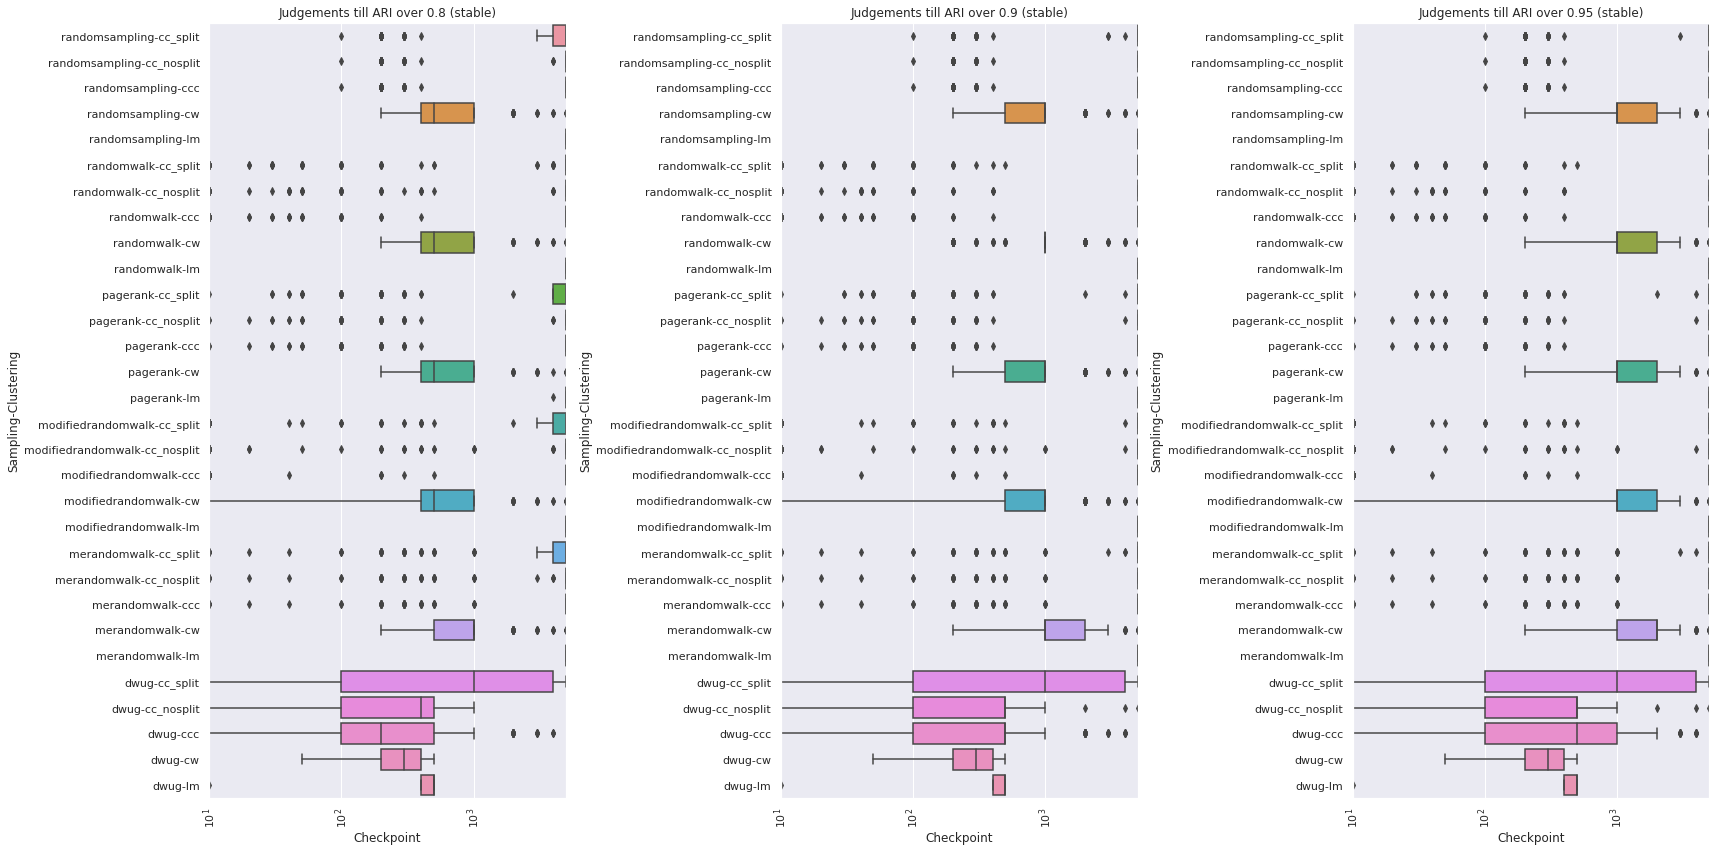

In [31]:
f = plt.figure(figsize=(24, 12))
gs = f.add_gridspec(1, 3)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=dfs_ari[0], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.8 (stable)', xscale='log')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=dfs_ari[1], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.9 (stable)', xscale='log')

f.add_subplot(gs[0, 2])
ax = sns.boxplot(data=dfs_ari[2], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.95 (stable)', xscale='log')

f.tight_layout()

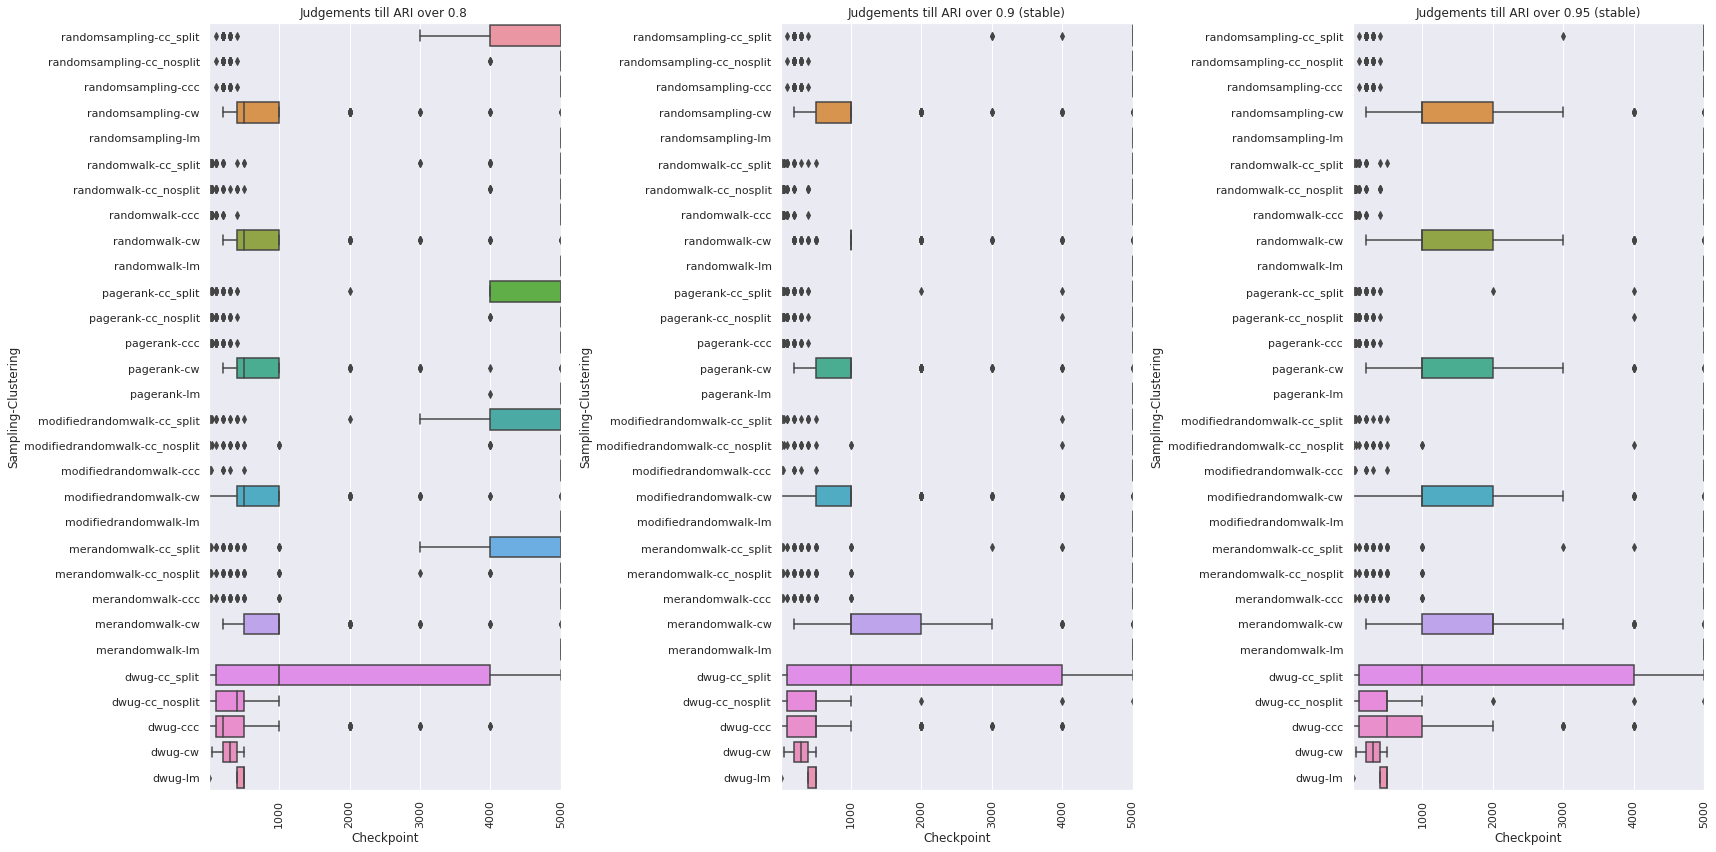

In [32]:
f = plt.figure(figsize=(24, 12))
gs = f.add_gridspec(1, 3)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=dfs_ari[0], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.8 ')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=dfs_ari[1], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.9 (stable)')

f.add_subplot(gs[0, 2])
ax = sns.boxplot(data=dfs_ari[2], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till ARI over 0.95 (stable)')

f.tight_layout()

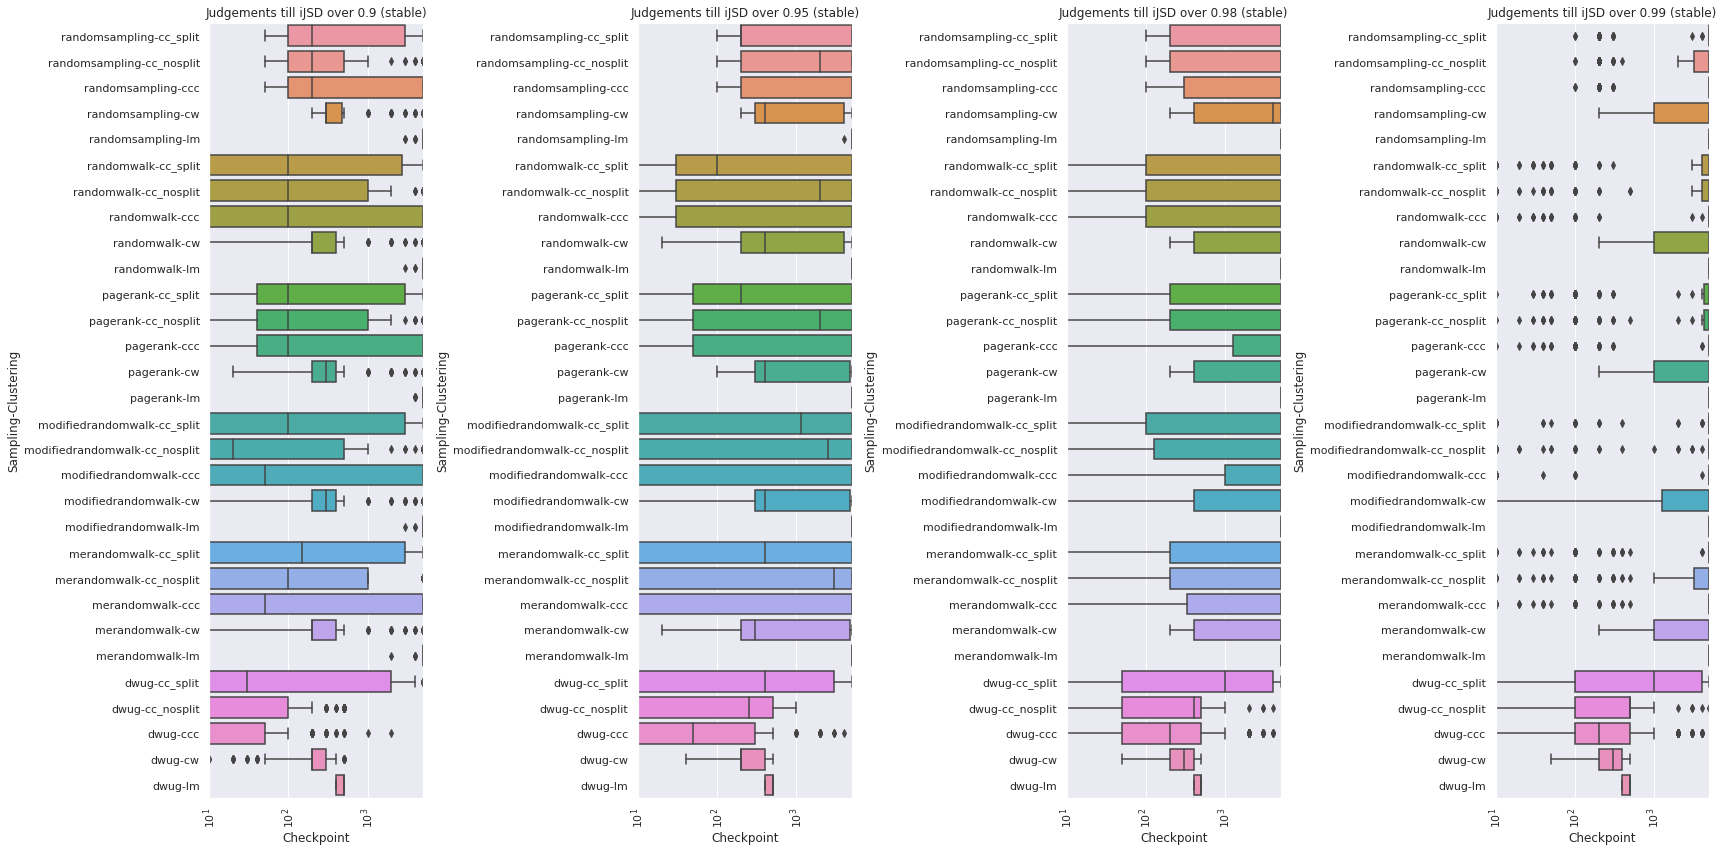

In [33]:
f = plt.figure(figsize=(24, 12))
gs = f.add_gridspec(1, 4)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=dfs_ijsd[0], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.9 (stable)', xscale='log')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=dfs_ijsd[1], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.95 (stable)', xscale='log')

f.add_subplot(gs[0, 2])
ax = sns.boxplot(data=dfs_ijsd[2], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.98 (stable)', xscale='log')

f.add_subplot(gs[0, 3])
ax = sns.boxplot(data=dfs_ijsd[3], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.99 (stable)', xscale='log')
f.tight_layout()

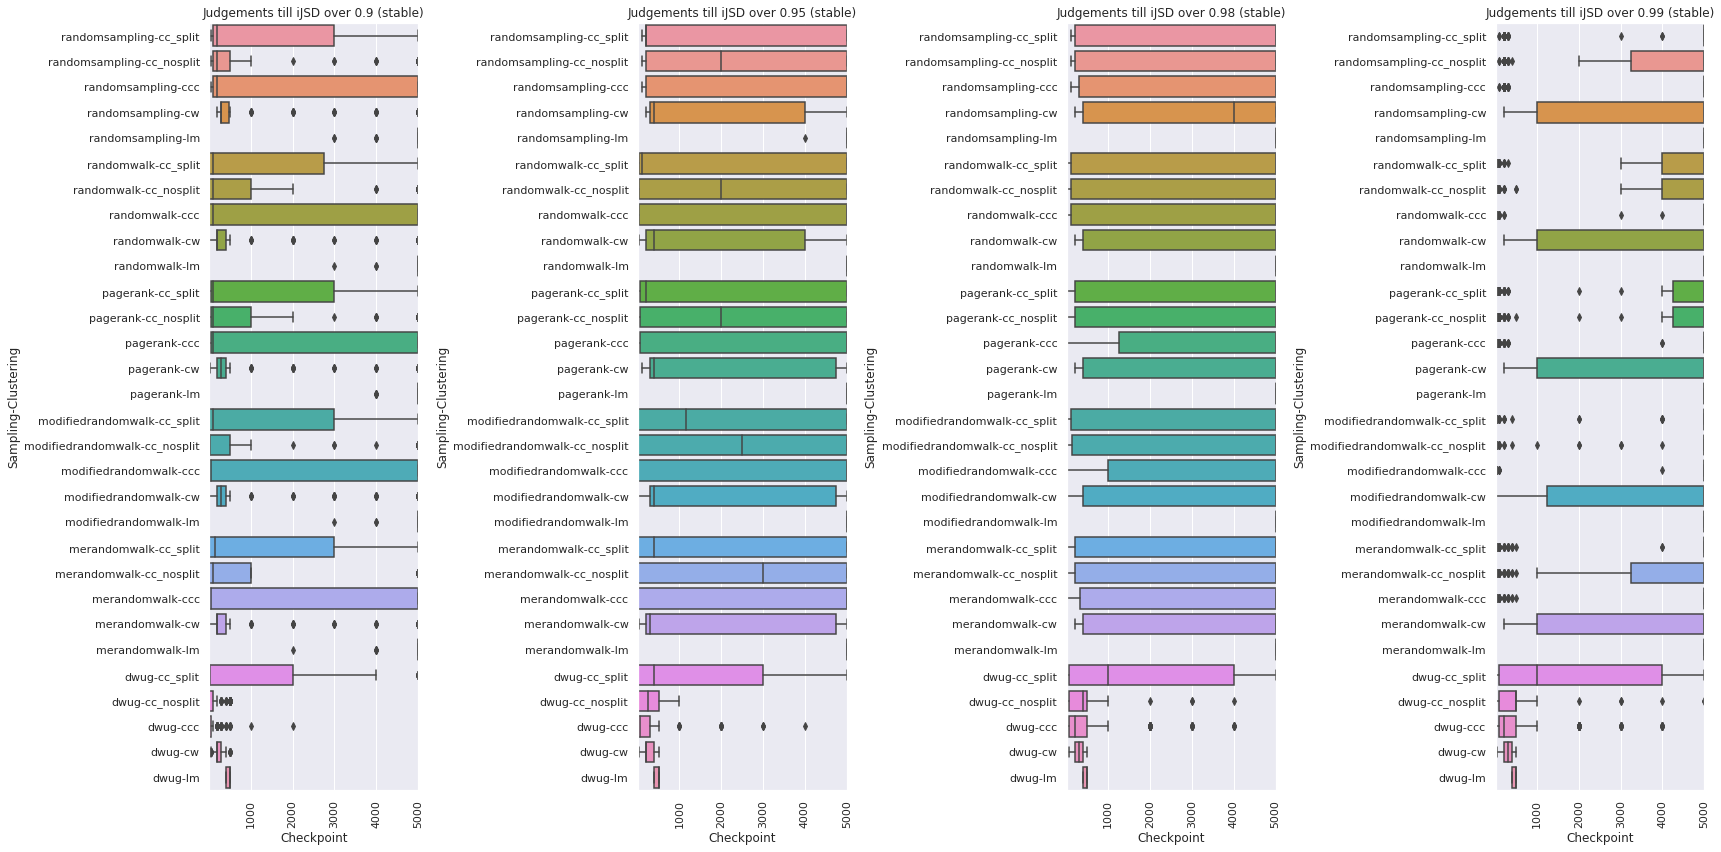

In [35]:
f = plt.figure(figsize=(24, 12))
gs = f.add_gridspec(1, 4)

f.add_subplot(gs[0, 0])
ax = sns.boxplot(data=dfs_ijsd[0], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.9 (stable)')


f.add_subplot(gs[0, 1])
ax = sns.boxplot(data=dfs_ijsd[1], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.95 (stable)')

f.add_subplot(gs[0, 2])
ax = sns.boxplot(data=dfs_ijsd[2], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.98 (stable)')

f.add_subplot(gs[0, 3])
ax = sns.boxplot(data=dfs_ijsd[3], x='Checkpoint', y='Sampling-Clustering', orient='h')
for item in ax.get_xticklabels():
    item.set_rotation(90)
ax.set(xlim=[10, 5000], title='Judgements till iJSD over 0.99 (stable)')

f.tight_layout()